<a href="https://colab.research.google.com/github/Danil-Kazakov/Data-HW3/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

напишіть функцію гіпотези лінійної регресії у векторному вигляді;


In [24]:
def h(weight, sample_x):
  assert len(weight) == len(sample_x)+1
  x = np.concatenate(([1],sample_x)).astype('int64')
  w = np.array(weight)
  return np.dot(x,w)

weights = [0.5, 1.5, -2.0]
sample_x = [2, 3]
expected_result = -2.5
result = h(weights, sample_x)

print("Результат гіпотези:", result)
print("Очікуваний результат:", expected_result)


Результат гіпотези: -2.5
Очікуваний результат: -2.5


створіть функцію для обчислення функції втрат у векторному вигляді

In [25]:
def func(weight, df, columns):
    m = df.shape[0]
    cost = 0
    for y, *features in zip(*[df[column] for column in columns]):
        cost += (h(weight, features) - y)**2
    return cost / (2 * m)

реалізуйте один крок градієнтного спуску;

In [26]:
def gradient_descent_step(X, y, theta, alpha):
    m = len(y)
    predictions = hypothesis(X, theta)
    error = predictions - y
    gradient = (1 / m) * np.dot(X.T, error)
    theta = theta - alpha * gradient
    return theta

X = np.array([
    [1, 1],
    [1, 2],
    [1, 3]
])
y = np.array([1, 2, 3])

theta = np.array([0.5, 1.5])

alpha = 0.01

theta = gradient_descent_step(X, y, theta, alpha)

print("Оновлений вектор параметрів (theta):")
print(theta)

Оновлений вектор параметрів (theta):
[0.485      1.46666667]


знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

Знайдені параметри (градієнтний спуск): [ 0.         -0.71471799 -0.56222321  0.61103257]


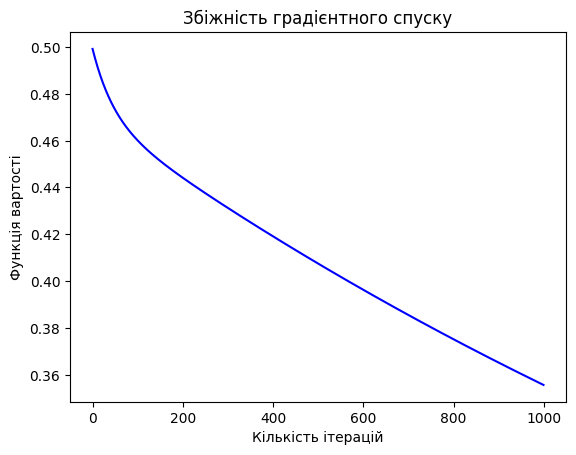

Прогнозовані ціни (градієнтний спуск): [12385911.77038687 12497036.99018031 12177877.25080734 12352774.17582202
 12011399.81280347]


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'price': [13300000, 12250000, 12250000, 12215000, 11410000],
    'area': [7420, 8960, 9960, 7500, 7420],
    'bedrooms': [4, 4, 3, 4, 4],
    'bathrooms': [2, 4, 2, 2, 1]
}

df = pd.DataFrame(data)

X = df[['area', 'bedrooms', 'bathrooms']].values
y = df['price'].values

X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1
X = (X - X_mean) / X_std

y_mean = np.mean(y)
y_std = np.std(y)
if y_std == 0:
    y_std = 1
y = (y - y_mean) / y_std

def h(X, theta):
    return np.dot(X, theta)

def compute_cost(X, y, theta):
    m = len(y)
    cost = (1/(2*m)) * np.sum((h(X, theta) - y)**2)
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = np.zeros(num_iters)

    for i in range(num_iters):
        gradient = (1/m) * np.dot(X.T, (h(X, theta) - y))
        theta = theta - alpha * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

alpha = 0.01
num_iters = 1000

theta = np.zeros(X.shape[1])

theta_grad, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

print("Знайдені параметри (градієнтний спуск):", theta_grad)

plt.plot(range(num_iters), cost_history, 'b')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Функція вартості')
plt.title('Збіжність градієнтного спуску')
plt.show()

y_pred_grad = h(X, theta_grad) * y_std + y_mean

print("Прогнозовані ціни (градієнтний спуск):", y_pred_grad)


знайдіть ці ж параметри за допомогою аналітичного рішення

In [38]:
data = {
    'price': [13300000, 12250000, 12250000, 12215000, 11410000],
    'area': [7420, 8960, 9960, 7500, 7420],
    'bedrooms': [4, 4, 3, 4, 4],
    'bathrooms': [2, 4, 2, 2, 1]
}

df = pd.DataFrame(data)

X = df[['area', 'bedrooms', 'bathrooms']].values
y = df['price'].values

X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

theta_analytical = np.linalg.pinv(X.T @ X) @ X.T @ y

print("Знайдені параметри (аналітичне рішення):", theta_analytical)

y_pred_analytical = np.dot(X, theta_analytical)

print("Прогнозовані ціни (аналітичне рішення):", y_pred_analytical)



Знайдені параметри (аналітичне рішення): [ 4.98594118e+07 -2.42322162e+03 -5.51290015e+06  1.53228796e+06]
Прогнозовані ціни (аналітичне рішення): [12892082.76432865 12224897.40016315 12250000.00020869 12698225.03487663
 11359794.8004357 ]


порівняйте отримані результати

In [39]:
print("Порівняння параметрів:")
print("Градієнтний спуск:", theta_grad)
print("Аналітичне рішення:", theta_analytical)

print("Порівняння прогнозованих цін:")
print("Градієнтний спуск:", y_pred_grad)
print("Аналітичне рішення:", y_pred_analytical)


Порівняння параметрів:
Градієнтний спуск: [ 0.         -0.71471799 -0.56222321  0.61103257]
Аналітичне рішення: [ 4.98594118e+07 -2.42322162e+03 -5.51290015e+06  1.53228796e+06]
Порівняння прогнозованих цін:
Градієнтний спуск: [12385911.77038687 12497036.99018031 12177877.25080734 12352774.17582202
 12011399.81280347]
Аналітичне рішення: [12892082.76432865 12224897.40016315 12250000.00020869 12698225.03487663
 11359794.8004357 ]
